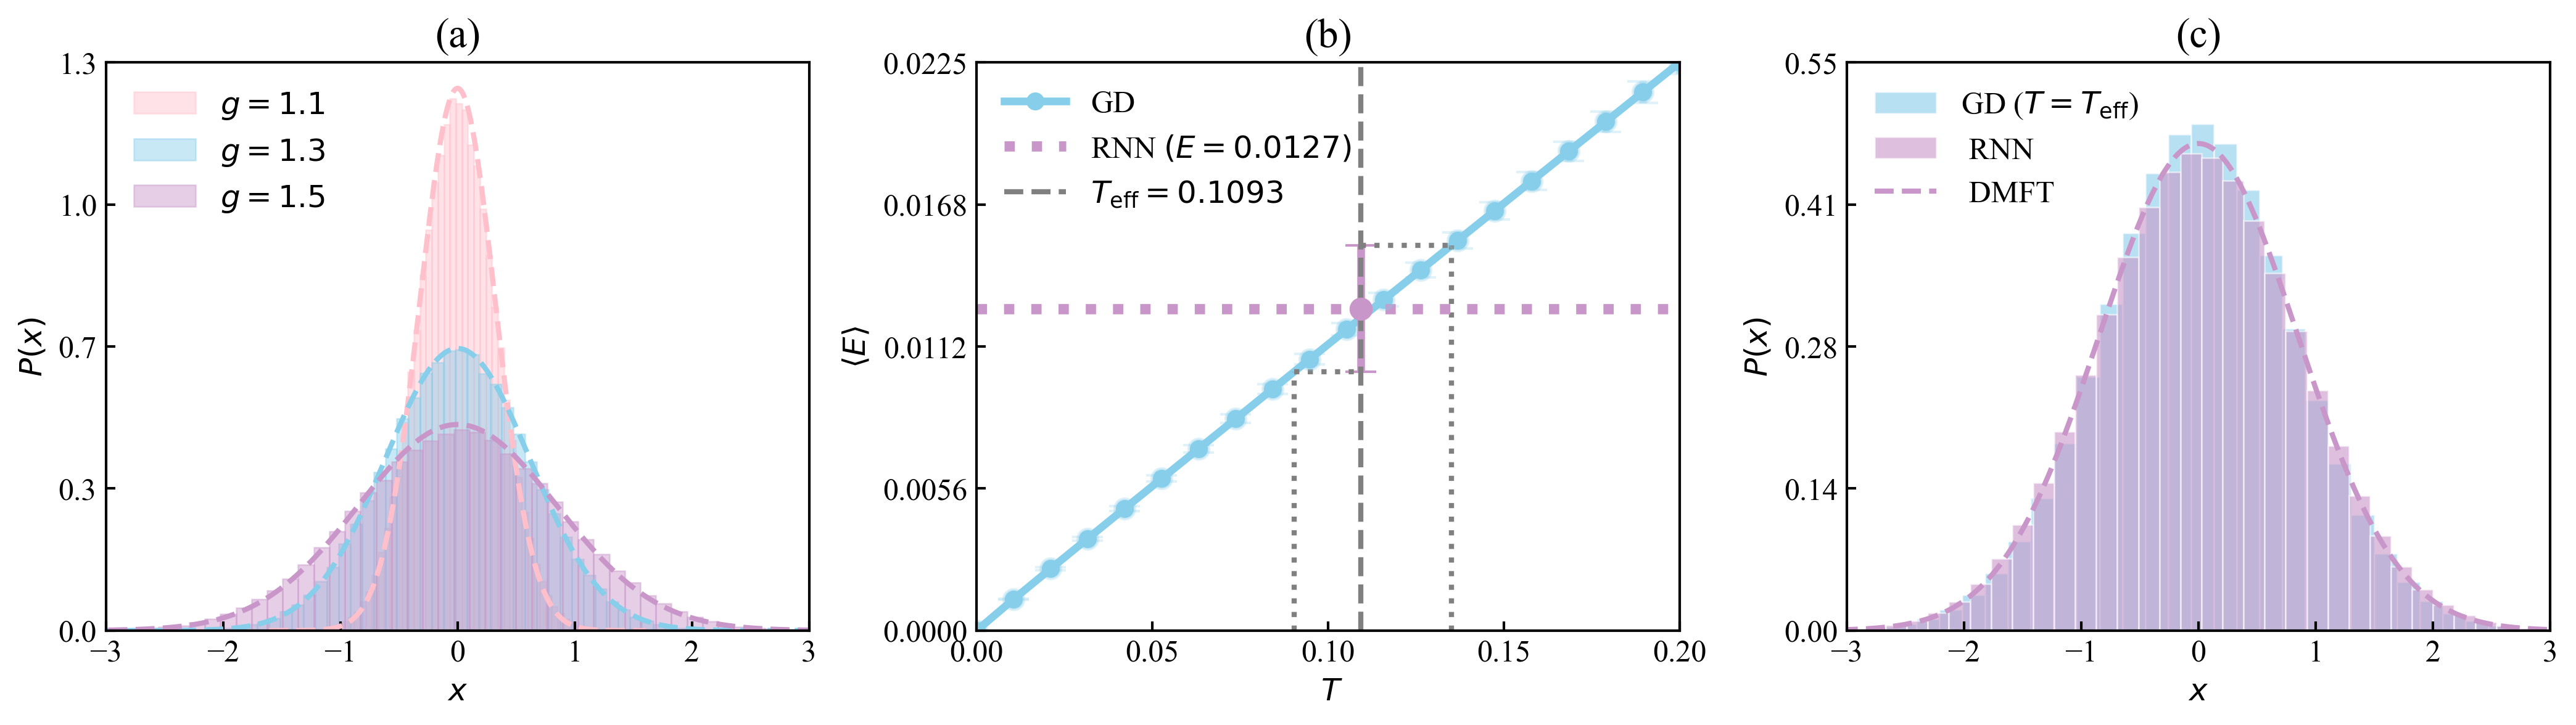

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import interp1d
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['legend.frameon'] = False

# =========================================================
#  Panel (a): RNN samples vs DMFT theoretical distribution
# =========================================================
def plot_rnn_dmft(ax):
    g_list = [1.1, 1.3, 1.5]
    Color_list = ['pink', 'skyblue', '#C896C8']
    save_dir = "./"

    for idx, g in enumerate(g_list):
        df_sample = pd.read_csv(os.path.join(save_dir, f"rnn_samples_g{g:.2f}.csv"))
        X_sample = df_sample.iloc[:, 0].values
        df_theory = pd.read_csv(os.path.join(save_dir, f"dmft_theory_g{g:.2f}.csv"))
        x_theory = df_theory["x"].values
        P_theory = df_theory["P_theory"].values
        # === Histogram ===
        ax.hist(
            X_sample, bins=60, density=True, alpha=0.45,
            edgecolor=Color_list[idx], linewidth=0.6, facecolor=Color_list[idx],
            label=rf"$g={g:.1f}$")
        # === DMFT curve ===
        ax.plot(x_theory, P_theory, linestyle='--', lw=2.0, color=Color_list[idx])
    ax.set_xlabel(r"$x$", fontsize=12)
    ax.set_ylabel(r"$P(x)$", fontsize=12)
    ax.set_xlim(-3, 3)
    ax.set_ylim(0.0, 1.3)
    ax.set_yticks(np.linspace(0.0,1.3,5))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}"))
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(fontsize=12, loc="upper left")
    ax.set_title('(a)', fontsize=16)


# =========================================================
# Panel (b): Mean kinetic energy vs temperature (T_eff)
# =========================================================
def plot_energy_T(ax):
    df = pd.read_csv("energy_vs_T.csv")
    T_list = df["Temperature"].values
    E_boltz_list = df["GDE"].values
    E_boltz_std = df["GDE_std"].values
    T_eff = df["T_eff"].values[0]
    E_rnn = df["E_rnn_value"].values[0]
    E_rnn_std = df["E_rnn_std"].values[0]
    ax.plot(T_list, E_boltz_list,'o-',color='skyblue',linewidth=3,label="GD")
    ax.errorbar(T_list,E_boltz_list,E_boltz_std, alpha=0.25, fmt='o',color='skyblue',  markersize=8,
        elinewidth=3,
        capsize=6)
 
    E_to_T = interp1d(E_boltz_list,T_list,kind="linear",
        bounds_error=False,fill_value="extrapolate")
    E_low  = E_rnn - E_rnn_std
    E_high = E_rnn + E_rnn_std
    T_low  = float(E_to_T(E_low))
    T_high = float(E_to_T(E_high))

    ax.errorbar(T_eff, E_rnn, yerr=E_rnn_std, fmt='o',color='#C896C8',
                markersize=8, elinewidth=3, capsize=6,)
    ax.vlines(x=T_low, ymin=0.0, ymax=E_low, color='gray', linestyle=':', linewidth=2)
    ax.vlines(x=T_high, ymin=0.0, ymax=E_high, color='gray', linestyle=':', linewidth=2 )
    ax.hlines(y=E_low, xmin=T_low, xmax=T_eff, color='gray', linestyle=':', linewidth=2)
    ax.hlines(y=E_high, xmin=T_eff, xmax=T_high, color='gray',
        linestyle=':', linewidth=2)
    ax.axhline(E_rnn, color='#C896C8', linestyle=':',linewidth=4, label=rf"RNN $(E={E_rnn:.4f})$")
    ax.axvline(T_eff, color='gray', linestyle='--', linewidth=2,label=rf"$T_\mathrm{{eff}}={T_eff:.4f}$")
    ax.set_xlim(0.0, 0.2)
    ax.set_ylim(E_boltz_list[0], E_boltz_list[-1])
    ax.set_yticks(np.linspace(E_boltz_list[0], E_boltz_list[-1],5))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.4f}"))
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xticks(np.linspace(0.0, 0.2,5))
    ax.set_xlabel(" $T$", fontsize=12)
    ax.set_ylabel(r"$\langle E \rangle$", fontsize=12)
    ax.legend(fontsize=12, loc="upper left")
    ax.set_title("(b)", fontsize=16)


# =========================================================
#  Panel (c): Classical RNN vs Boltzmann distribution
# =========================================================
def plot_classical_vs_boltz(ax):
    save_dir = os.getcwd()
    samples_boltz =  pd.read_csv(os.path.join(save_dir, "samples_boltz.csv"))
    samples_classi =  pd.read_csv(os.path.join(save_dir, "samples_classical.csv"))
    g_list = [1.1, 1.3, 1.5]
    df_theory = pd.read_csv(os.path.join(save_dir, f"dmft_theory_g{g_list[-1]:.2f}.csv"))
    x_theory = df_theory["x"].values
    P_theory = df_theory["P_theory"].values
    with open(os.path.join(save_dir, "T1.txt"), "r") as f:
        T1 = float(f.read().strip())
    ax.hist(samples_boltz, bins=50, density=True,edgecolor='white',linewidth=0.6, facecolor='skyblue',alpha=0.6,
            label=rf"GD ($T=T_\mathrm{{eff}}$)")
    ax.hist(samples_classi, bins=50, density=True,
            edgecolor='white', linewidth=0.6, facecolor='#C896C8',alpha=0.6, label=" RNN")
    ax.plot(x_theory, P_theory, linestyle='--', label=" DMFT",lw=2.0, color='#C896C8')
    ax.set_xlim(-3, 3)
    ax.set_ylim(0.0, 0.55)
    ax.set_yticks(np.linspace(0.0,0.55,5))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}"))
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xlabel(r"$x$", fontsize=12)
    ax.set_ylabel(r"$P(x)$", fontsize=12)
    ax.legend(fontsize=12, loc="upper left")
    ax.set_title("(c)", fontsize=16)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), dpi=300)
plot_rnn_dmft(axes[0])
plot_energy_T(axes[1])
plot_classical_vs_boltz(axes[2])
plt.tight_layout(pad=1.0)
plt.savefig("combined_1x3_result.pdf", format="pdf")
plt.show()


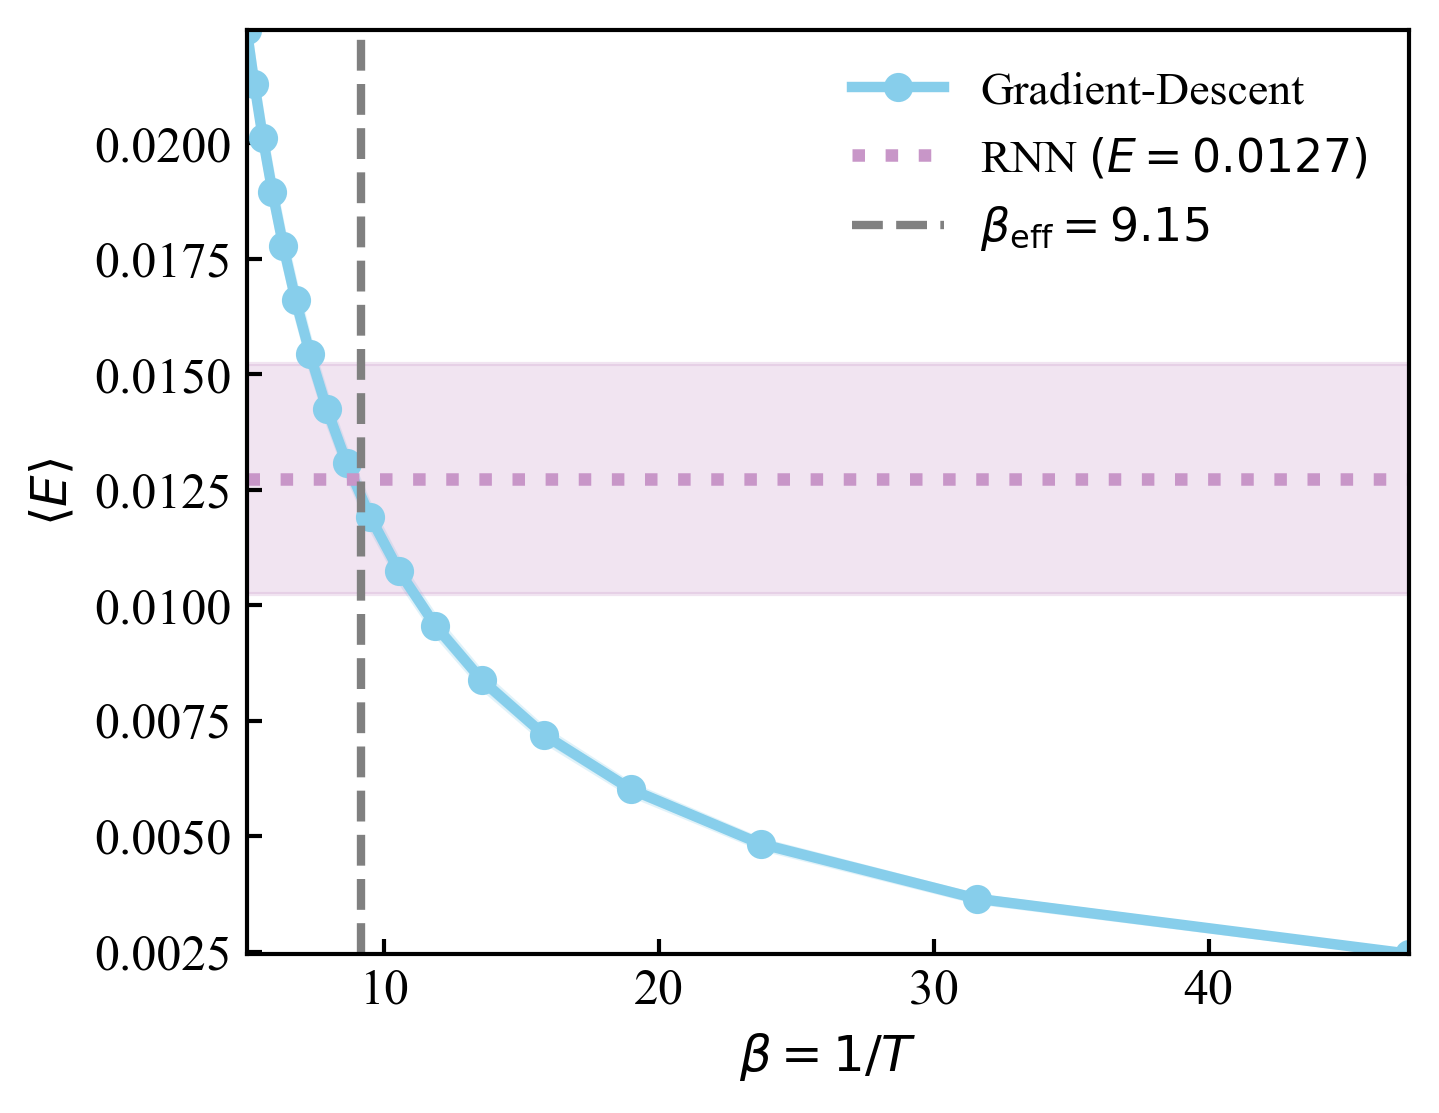

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['legend.frameon'] = False

df = pd.read_csv("energy_vs_T.csv")
T = df["Temperature"].values
beta = 1.0 / T
E_gd = df["GDE"].values
E_gd_std = df["GDE_std"].values
E_rnn = df["E_rnn_value"].values[0]
E_rnn_std = df["E_rnn_std"].values[0]
T_eff = df["T_eff"].values[0]
beta_eff = 1.0 / T_eff

idx = np.argsort(beta)
beta = beta[idx]
E_gd = E_gd[idx]
E_gd_std = E_gd_std[idx]
beta = beta[:-2]
E_gd = E_gd[:-2]
E_gd_std = E_gd_std[:-2]

fig, ax = plt.subplots(figsize=(5, 4), dpi=300)

ax.plot(beta, E_gd, 'o-', color='skyblue', linewidth=2.5, label="Gradient-Descent")
ax.fill_between( beta, E_gd - E_gd_std, E_gd + E_gd_std, color='skyblue', alpha=0.25 )
ax.axhline( E_rnn, color='#C896C8', linestyle=':', linewidth=3, label=rf"RNN $(E={E_rnn:.4f})$")
ax.fill_between( beta, E_rnn - E_rnn_std, E_rnn + E_rnn_std, color='#C896C8', alpha=0.25 )
ax.axvline( beta_eff, color='gray', linestyle='--', linewidth=2, label=rf"$\beta_\mathrm{{eff}}={beta_eff:.2f}$" )
ax.set_xlim(min(beta), max(beta))
ax.set_ylim(min(E_gd), max(E_gd))
ax.set_xlabel(r"$\beta = 1/T$", fontsize=12)
ax.set_ylabel(r"$\langle E \rangle$", fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.4f}"))
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=11, loc="upper right")

plt.savefig("energy_vs_beta.pdf", format="pdf")
plt.show()
